# K-means clustering for the Iris data set

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/Users/catherinewu/.pyenv/versions/3.7.4/envs/dagster37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:

# Injected parameters
from dagster import seven as __dm_seven
import dagstermill as __dm_dagstermill
context = __dm_dagstermill._reconstitute_pipeline_context(
    **{
        key: __dm_seven.json.loads(value)
        for key, value
        in {'executable_dict': '{"__class__": "ReconstructablePipeline", "pipeline_name": "iris_pipeline", "repository": {"__class__": "ReconstructableRepository", "pointer": {"__class__": "FileCodePointer", "fn_name": "iris_pipeline", "python_file": "iris_pipeline_2.py", "working_directory": "/Users/catherinewu/dagster/examples/docs_snippets/docs_snippets/legacy/data_science"}}, "solid_selection_str": null, "solids_to_execute": null}', 'pipeline_run_dict': '{"__class__": "PipelineRun", "execution_plan_snapshot_id": "61f29e472c9bc06e65df88b48fc51c5f7b5a038f", "mode": "default", "parent_run_id": null, "pipeline_name": "iris_pipeline", "pipeline_snapshot_id": "e6cd413870dee4c67095a17435f4efbb42437abb", "root_run_id": null, "run_config": {"solids": {"download_file": {"config": {"path": "iris.data", "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"}}, "k_means_iris": {"config": {"seed": 50}, "inputs": {"secret_number": 12345}}}, "storage": {"filesystem": null}}, "run_id": "5075d72d-e248-452d-88a0-7453cf6dda67", "solid_selection": null, "solids_to_execute": null, "status": {"__enum__": "PipelineRunStatus.NOT_STARTED"}, "step_keys_to_execute": null, "tags": {"dagster/solid_selection": "*"}}', 'solid_handle_kwargs': '{"name": "k_means_iris", "parent": null}', 'instance_ref_dict': '{"__class__": "InstanceRef", "compute_logs_data": {"__class__": "ConfigurableClassData", "class_name": "LocalComputeLogManager", "config_yaml": "base_dir: /Users/catherinewu/dagster/storage\\n", "module_name": "dagster.core.storage.local_compute_log_manager"}, "event_storage_data": {"__class__": "ConfigurableClassData", "class_name": "SqliteEventLogStorage", "config_yaml": "base_dir: /Users/catherinewu/dagster/history/runs/\\n", "module_name": "dagster.core.storage.event_log"}, "local_artifact_storage_data": {"__class__": "ConfigurableClassData", "class_name": "LocalArtifactStorage", "config_yaml": "base_dir: /Users/catherinewu/dagster\\n", "module_name": "dagster.core.storage.root"}, "run_launcher_data": {"__class__": "ConfigurableClassData", "class_name": "DefaultRunLauncher", "config_yaml": "{}\\n", "module_name": "dagster"}, "run_storage_data": {"__class__": "ConfigurableClassData", "class_name": "SqliteRunStorage", "config_yaml": "base_dir: /Users/catherinewu/dagster/history/\\n", "module_name": "dagster.core.storage.runs"}, "schedule_storage_data": {"__class__": "ConfigurableClassData", "class_name": "SqliteScheduleStorage", "config_yaml": "base_dir: /Users/catherinewu/dagster/schedules\\n", "module_name": "dagster.core.storage.schedules"}, "scheduler_data": {"__class__": "ConfigurableClassData", "class_name": "SystemCronScheduler", "config_yaml": "{}\\n", "module_name": "dagster_cron.cron_scheduler"}, "settings": {"opt_in": null, "telemetry": {"enabled": false}}}', 'output_log_path': '"/var/folders/kc/ktvc7zns7tlfgz7srfkb34280000gn/T/tmpx6zss5ou"', 'marshal_dir': '"/tmp/dagstermill/5075d72d-e248-452d-88a0-7453cf6dda67/marshal"', 'run_config': '{"solids": {"download_file": {"config": {"path": "iris.data", "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"}}, "k_means_iris": {"config": {"seed": 50}, "inputs": {"secret_number": 12345}}}, "storage": {"filesystem": null}}'}.items()
    }
)
path = __dm_dagstermill._load_parameter('path', '{"value": "/Users/catherinewu/dagster/examples/docs_snippets/docs_snippets/legacy/data_science/iris.data"}')
secret_number = __dm_dagstermill._load_parameter('secret_number', '{"value": 12345}')


2020-09-11 01:35:21 - dagster - INFO - system - 5075d72d-e248-452d-88a0-7453cf6dda67 - in reconstitute_pipeline_context with solid name k_means_iris
dagster/solid_selection = "*"


2020-09-11 01:35:21 - dagster - INFO - system - 5075d72d-e248-452d-88a0-7453cf6dda67 - solid_handle_kwargs{"name": "k_means_iris", "parent": null}
dagster/solid_selection = "*"


2020-09-11 01:35:21 - dagster - INFO - system - 5075d72d-e248-452d-88a0-7453cf6dda67 - full run_config{"solids": {"download_file": {"config": {"path": "iris.data", "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"}}, "k_means_iris": {"config": {"seed": 50}, "inputs": {"secret_number": 12345}}}, "storage": {"filesystem": null}}
dagster/solid_selection = "*"


2020-09-11 01:35:21 - dagster - INFO - system - 5075d72d-e248-452d-88a0-7453cf6dda67 - solid_confignull
dagster/solid_selection = "*"


In [3]:
context.log.info(str(type(context)))
context.log.info('what the fuck')
# context.log.info(context.solid_config)
solid_config = context.solid_config
import json
context.log.info(json.dumps(solid_config))
# solid_config = context.solid_config["download_file"]
# context.log.info(solid_config)

iris = pd.read_csv(
    path,
    names=['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)', 'Species']
)

2020-09-11 01:35:21 - dagster - INFO - system - 5075d72d-e248-452d-88a0-7453cf6dda67 - <class 'dagstermill.context.DagstermillRuntimeExecutionContext'>
dagster/solid_selection = "*"


2020-09-11 01:35:21 - dagster - INFO - system - 5075d72d-e248-452d-88a0-7453cf6dda67 - what the fuck
dagster/solid_selection = "*"


2020-09-11 01:35:21 - dagster - INFO - system - 5075d72d-e248-452d-88a0-7453cf6dda67 - returning self._solid_config
dagster/solid_selection = "*"


2020-09-11 01:35:21 - dagster - INFO - system - 5075d72d-e248-452d-88a0-7453cf6dda67 - {"seed": 50}
dagster/solid_selection = "*"


In [4]:
iris.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.describe()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


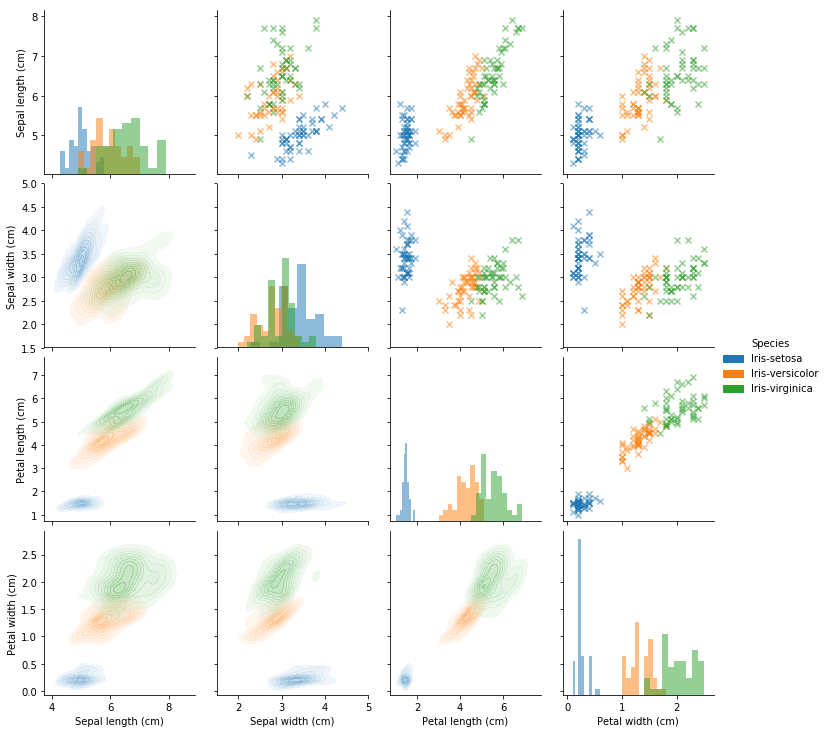

In [7]:
g = sns.PairGrid(iris, hue="Species")
g.map_diag(plt.hist, alpha=0.5)
g.map_upper(plt.scatter, alpha=0.5, marker='x')
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha=0.3)
g.add_legend();

Famously, while it's easy to see from theese plots that _Iris setosa_ is linearly separable from the other two species, the _versicolor_ and _virginica_ flowers are not linearly separable. We can see this another way by looking at box plots of the measured attributes:

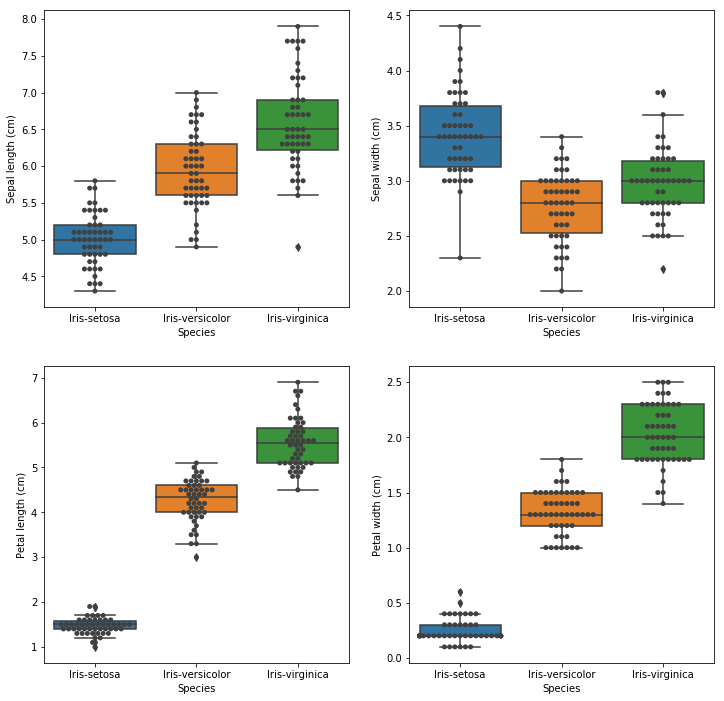

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

sns.boxplot(x="Species", y="Sepal length (cm)", data=iris, ax=axs[0, 0])
sns.swarmplot(x="Species", y="Sepal length (cm)", data=iris, color=".25", ax=axs[0, 0])

sns.boxplot(x="Species", y="Sepal width (cm)", data=iris, ax=axs[0, 1])
sns.swarmplot(x="Species", y="Sepal width (cm)", data=iris, color=".25", ax=axs[0, 1])

sns.boxplot(x="Species", y="Petal length (cm)", data=iris, ax=axs[1, 0])
sns.swarmplot(x="Species", y="Petal length (cm)", data=iris, color=".25", ax=axs[1, 0])

sns.boxplot(x="Species", y="Petal width (cm)", data=iris, ax=axs[1, 1])
sns.swarmplot(x="Species", y="Petal width (cm)", data=iris, color=".25", ax=axs[1, 1])

If we try to cluster this data using a method such as _k_-means, we'll be unsuccessful. Consider:

In [9]:
import sklearn.cluster
estimator = sklearn.cluster.KMeans(n_clusters=3)
estimator.fit(iris[['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
iris['K-means cluster assignment'] = estimator.labels_

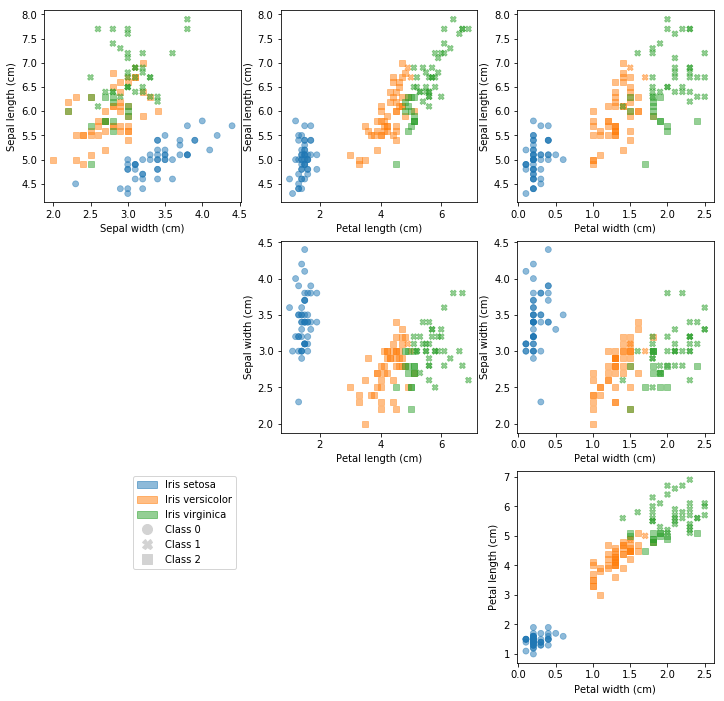

In [11]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))

sns.scatterplot(x="Sepal width (cm)", y="Sepal length (cm)", data=iris, ax=axs[0, 0], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)
sns.scatterplot(x="Petal length (cm)", y="Sepal length (cm)", data=iris, ax=axs[0, 1], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)
sns.scatterplot(x="Petal width (cm)", y="Sepal length (cm)", data=iris, ax=axs[0, 2], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)

sns.scatterplot(x="Petal length (cm)", y="Sepal width (cm)", data=iris, ax=axs[1, 1], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)
sns.scatterplot(x="Petal width (cm)", y="Sepal width (cm)", data=iris, ax=axs[1, 2], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)

p = sns.scatterplot(x="Petal width (cm)", y="Petal length (cm)", data=iris, ax=axs[2, 2], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)

axs[1, 0].axis('off')
axs[2, 0].axis('off')
axs[2, 1].axis('off')

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

palette = sns.color_palette()
setosa = mpatches.Patch(color=palette[0], label='Iris setosa', alpha=0.5)
versicolor = mpatches.Patch(color=palette[1], label='Iris versicolor', alpha=0.5)
virginica = mpatches.Patch(color=palette[2], label='Iris virginica', alpha=0.5)

class_0 = mlines.Line2D([], [], marker='o', color='lightgrey', linestyle='None', markersize=10, label='Class 0')
class_1 = mlines.Line2D([], [], marker='X', color='lightgrey', linestyle='None', markersize=10, label='Class 1')
class_2 = mlines.Line2D([], [], marker='s', color='lightgrey', linestyle='None', markersize=10, label='Class 2')

axs[2,0].legend(handles=[setosa, versicolor, virginica, class_0, class_1, class_2])


We can see that _versicolor_ and _virginica_ individuals are incorrectly classified by the _k_-means estimator.

In [12]:
import dagstermill as __dm_dagstermill
__dm_dagstermill._teardown()
